In [1]:
from shapely.geometry.polygon import LineString
from pprint import pprint
import json

import lib.race_line as rl
import lib.optimal as opt

### Load track

In [2]:
race_line = rl.load(0.8, 500)

# Convert np array to list and remove last point because it is the same point as the first one

race_track = race_line.tolist()[:-1]

### Calculate optimal speeds

- Change `LOOK_AHEAD_POINTS` to influence how many points the algorithm looks ahead (the higher, the sooner the car will start to break)
- Change `MIN_SPEED` and `MAX_SPEED` to fit the track and model !

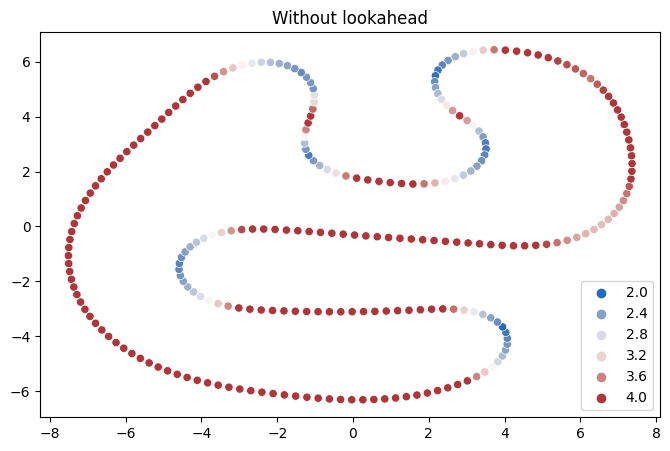

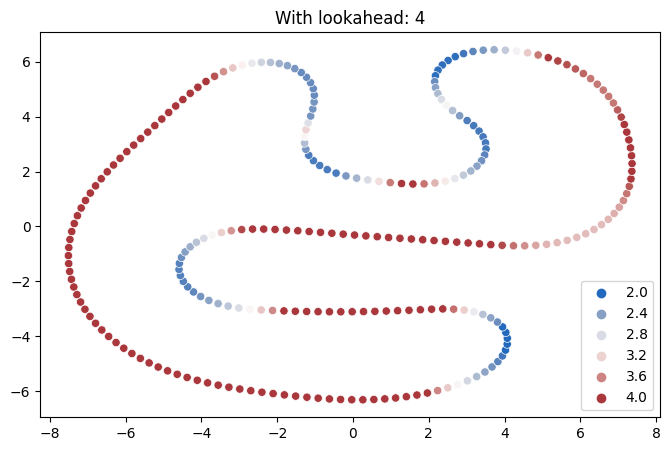

In [3]:
LOOK_AHEAD_POINTS = 4

MIN_SPEED = 2
MAX_SPEED = 4

optimal_speed = opt.speed(race_track, MIN_SPEED, MAX_SPEED, LOOK_AHEAD_POINTS)
optimal_speed_without_lookahead = opt.speed(race_track, MIN_SPEED, MAX_SPEED, 0)

opt.plot_speeds(
    race_track, LOOK_AHEAD_POINTS, optimal_speed, optimal_speed_without_lookahead
)

### Calculate optimal time

In [4]:
time_to_prev = opt.time(race_track, optimal_speed)

Total time for track, if racing line and speeds are followed perfectly: 21.82694934232449 s


### Append everything together

In [5]:
race_track_everything = opt.everything(race_track, optimal_speed, time_to_prev)

In [6]:
race_track_everything

[[0.6403, -0.37588, 4.0, 0.0753],
 [0.94014, -0.40453, 4.0, 0.0753],
 [1.24009, -0.43223, 4.0, 0.07531],
 [1.54015, -0.4591, 4.0, 0.07532],
 [1.84016, -0.48672, 4.0, 0.07532],
 [2.1401, -0.51505, 4.0, 0.07532],
 [2.43997, -0.54414, 4.0, 0.07532],
 [2.73978, -0.57388, 4.0, 0.07532],
 [3.03956, -0.60391, 4.0, 0.07532],
 [3.33931, -0.63425, 4.0, 0.07532],
 [3.63896, -0.66485, 4.0, 0.0753],
 [3.93834, -0.69021, 3.91023, 0.07684],
 [4.23686, -0.70567, 3.69654, 0.08086],
 [4.53321, -0.70687, 3.54428, 0.08361],
 [4.82555, -0.69017, 3.42349, 0.08553],
 [5.1117, -0.65275, 3.35544, 0.086],
 [5.38914, -0.59248, 3.32975, 0.08526],
 [5.65533, -0.50832, 3.31197, 0.0843],
 [5.90786, -0.40005, 3.31197, 0.08296],
 [6.14433, -0.26799, 3.31197, 0.08178],
 [6.36277, -0.1132, 3.31197, 0.08084],
 [6.56165, 0.06273, 3.31197, 0.08017],
 [6.73954, 0.25821, 3.3408, 0.07912],
 [6.89561, 0.47125, 3.37797, 0.07818],
 [7.02912, 0.69996, 3.45005, 0.07676],
 [7.1398, 0.94232, 3.56647, 0.07471],
 [7.22796, 1.19625, 3.

### Calculate optimal action space

In [7]:
action_space = opt.action_space(race_track, optimal_speed, MIN_SPEED, MAX_SPEED)

In [8]:
action_space

,steering_angle,speed,index
0,-12.1,3.4,0
1,-5.2,2.1,1
2,2.1,2.9,2
3,0.1,4.0,3
4,19.9,2.0,4
5,7.0,2.1,5
6,-9.0,2.6,6
7,13.6,3.3,7
8,1.3,3.3,8
9,-0.8,3.7,9


In [9]:
# convert to json for replacing in ec2

pprint(action_space.to_dict(orient="records"))

[{'index': 0, 'speed': 3.4, 'steering_angle': -12.1},
 {'index': 1, 'speed': 2.1, 'steering_angle': -5.2},
 {'index': 2, 'speed': 2.9, 'steering_angle': 2.1},
 {'index': 3, 'speed': 4.0, 'steering_angle': 0.1},
 {'index': 4, 'speed': 2.0, 'steering_angle': 19.9},
 {'index': 5, 'speed': 2.1, 'steering_angle': 7.0},
 {'index': 6, 'speed': 2.6, 'steering_angle': -9.0},
 {'index': 7, 'speed': 3.3, 'steering_angle': 13.6},
 {'index': 8, 'speed': 3.3, 'steering_angle': 1.3},
 {'index': 9, 'speed': 3.7, 'steering_angle': -0.8},
 {'index': 10, 'speed': 2.3, 'steering_angle': -23.3},
 {'index': 11, 'speed': 2.6, 'steering_angle': 6.2},
 {'index': 12, 'speed': 3.7, 'steering_angle': 12.5},
 {'index': 13, 'speed': 2.9, 'steering_angle': -10.0},
 {'index': 14, 'speed': 2.4, 'steering_angle': -2.5},
 {'index': 15, 'speed': 2.3, 'steering_angle': 16.3},
 {'index': 16, 'speed': 2.9, 'steering_angle': 15.1},
 {'index': 17, 'speed': 2.2, 'steering_angle': -14.7},
 {'index': 18, 'speed': 2.3, 'steering_